In [1]:
# intall azure form recognizer package if not done yet
#%pip install azure-ai-formrecognizer

In [2]:
# get key
import pandas as pd

keys = pd.read_csv("keys/keys_hezhang.csv", index_col=0)
openai_key = keys.loc["openai", "key_value"]
formrec_key = keys.loc["formrec", "key_value"]

In [3]:
import openai
openai.api_type = "azure"
openai.api_base = "https://explore-openai.openai.azure.com/"
openai.api_version = "2022-12-01"
openai.api_key = openai_key

model = "text-davinci-003" 

In [4]:
from IPython.display import Image
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient

formrec_endpoint = "https://australiaeast.api.cognitive.microsoft.com/"
formrec_keys = formrec_key

## 1. Load Data

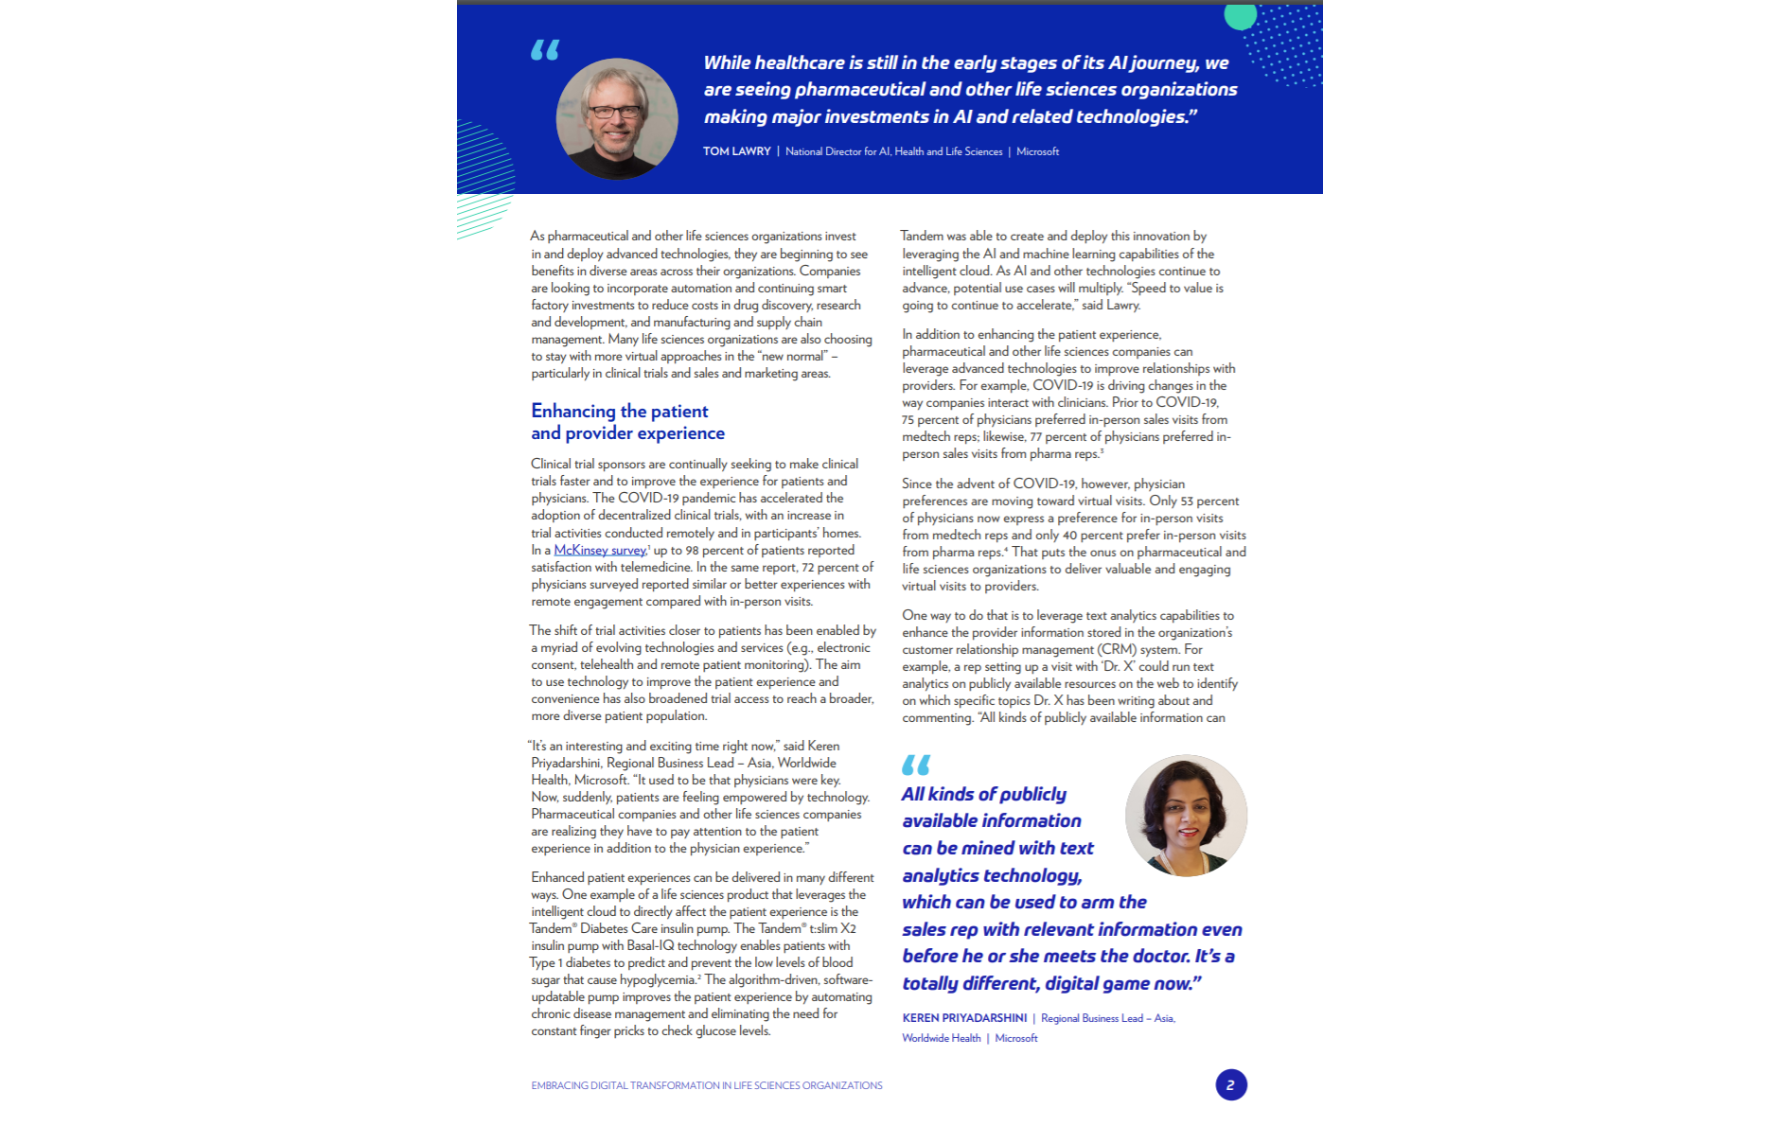

In [5]:
Image(filename="data/form_recognizer_read_sample.png")

## 2. Recognize Document Using Azure Form Recognizer 

In [6]:
# create an image-open file handler
with open("data/form_recognizer_read_sample.png", "rb") as fd:
    document = fd.read()

# call the Form Recognizer API
formrec_client = DocumentAnalysisClient(endpoint=formrec_endpoint, credential=AzureKeyCredential(formrec_key))
formrec_result = formrec_client.begin_analyze_document("prebuilt-read", document)
content = formrec_result.result().content
print ("Document content: \n\n", content)

Document content: 

 While healthcare is still in the early stages of its Al journey, we are seeing pharmaceutical and other life sciences organizations making major investments in Al and related technologies." TOM LAWRY | National Director for Al, Health and Life Sciences | Microsoft
As pharmaceutical and other life sciences organizations invest in and deploy advanced technologies, they are beginning to see benefits in diverse areas across their organizations. Companies are looking to incorporate automation and continuing smart factory investments to reduce costs in drug discovery, research and development, and manufacturing and supply chain management. Many life sciences organizations are also choosing to stay with more virtual approaches in the "new normal" - particularly in clinical trials and sales and marketing areas.
Enhancing the patient and provider experience
Clinical trial sponsors are continually seeking to make clinical trials faster and to improve the experience for patie

## 3. Summarize Text 

In [7]:
# create a prompt for text analytics
prompt = f"""Text: 

             ###
             {content}
             ###
             
             Tasks:
             1. Summarize the above text into 3 short sentences.
             2. Determine the above test topic. 
             3. Extract top 5 key entities that I need to pay attention to.
             
             Answer the above 3 tasks, one at a time.
          """

# openai results
response=openai.Completion.create(
    engine=model,
    prompt=prompt,
    temperature=0,
    max_tokens=1000,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0.5)
print(response["choices"][0]["text"].replace("\n", ""))

1. Pharmaceutical and other life sciences organizations are investing in advanced technologies to reduce costs, improve patient and provider experiences, and enhance virtual visits with providers. 2. The topic of the text is embracing digital transformation in life sciences organizations. 3. The top 5 key entities that need to be paid attention to are: Al and related technologies, automation, smart factory investments, telemedicine, and text analytics technology.


In [8]:
# create a prompt for text analytics
prompt = f"""Text: 

             ###
             {content}
             ###
             
             Tasks:
             1. Summarize the above text into 3 short sentences.
             2. Determine the above test topic. 
             3. Extract top 5 key entities that I need to pay attention to.
             
             Answer the above 3 tasks, one at a time, in simplified Chinese language.
          """

# openai results
response=openai.Completion.create(
    engine=model,
    prompt=prompt,
    temperature=0,
    max_tokens=1000,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0.5)
print(response["choices"][0]["text"].replace("\n", ""))

1. 生命科学机构正在大量投资人工智能和相关技术，以加快临床试验、减少成本并改善患者和医生的体验。2. 生命科学3. 人工智能、远程临床试验、电子同意、远程病人监测、Tandem® t:slim X2胰岛素泵、文本分析、客户关系管理（CRM）
